In [9]:
from plywood_gallery import ChapterConfig

ChapterConfig.clean_all(skip_warning=True)
ChapterConfig.generate_json()
ChapterConfig.reset_counter()

This path and all its child elements will be removed:/Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-minimal-example/gallery_assets
Deleted '/Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-minimal-example/gallery_assets' and all containing files and folder.
Successfully created /Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-minimal-example/gallery_assets/gallery_parameters.json!🦫


## 2D Arrays

In [10]:
ChapterConfig.set_chapter_name("2D Arrays")
plt.rcParams['figure.dpi'] = 150  


(0.0, 1.0, 0.0, 1.0)

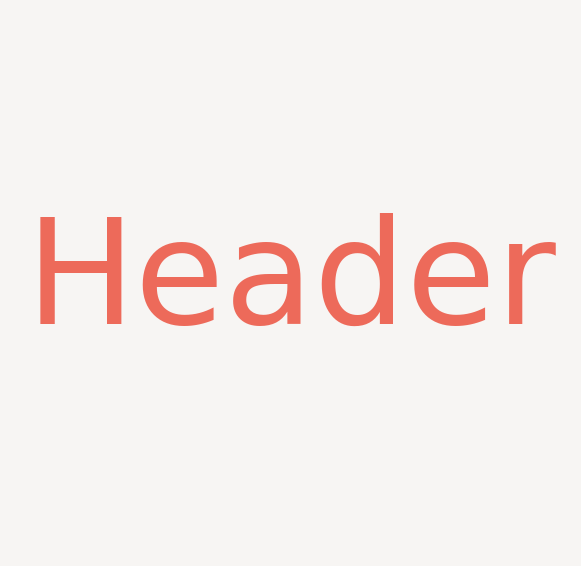

In [11]:
%%capture_png -p Header1.png --celltype Header
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def disp(x, sep=".0f", annot=False, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    sns.heatmap(x, annot=annot, fmt=sep, cmap="YlGnBu", cbar=False)


import matplotlib.pyplot as plt  # NOT

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} # NOT

fix, ax = plt.subplots(figsize=(5, 5), facecolor="#F7F5F3")  # NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A")  # NOT
ax.text(0.5, 0.5, "Header", **text_kwargs)  # NOT
ax.axis("off");  # NOT

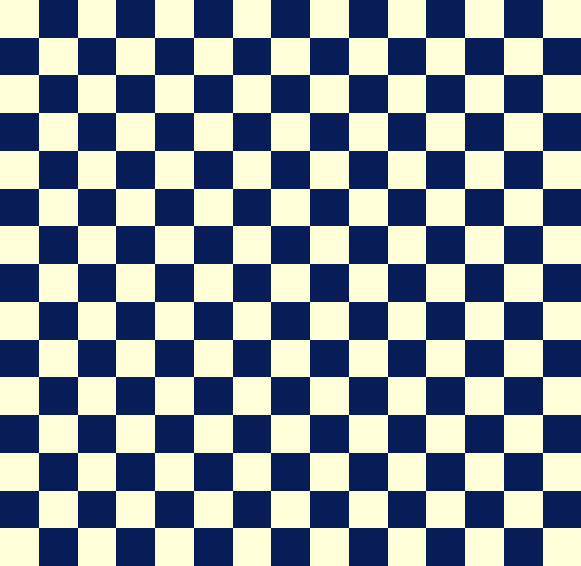

In [12]:
%%capture_png -p Chess.png
pixX, pixY = (15, 15)
array = [[(i + j) % 2 for i in range(pixX)] for j in range(pixY)]
disp(array)

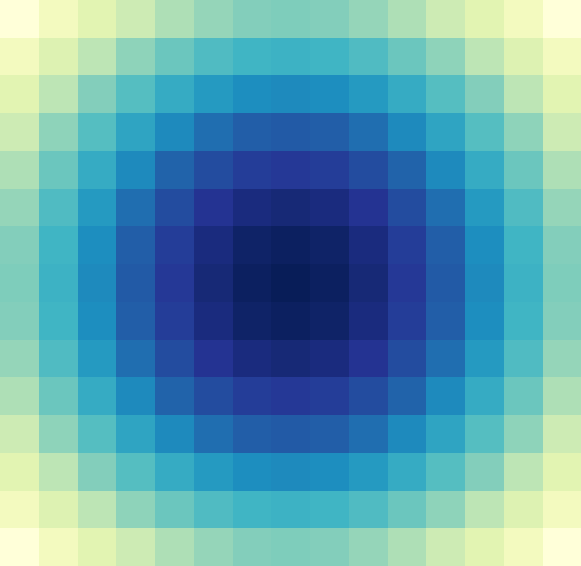

In [13]:
%%capture_png -p Gauss.png
pixX, pixY = (15, 15)
x, y = np.meshgrid(np.linspace(-1, 1, pixX), np.linspace(-1, 1, pixY))
d = np.sqrt(x**2 + y**2)
sigma, mu = 1.0, 0.0
array = np.exp(-((d - mu) ** 2 / (2.0 * sigma**2)))
disp(array, sep=".1f")

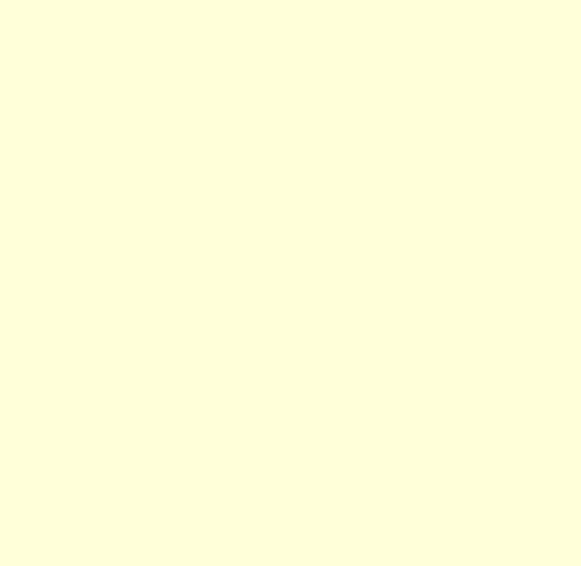

In [14]:
%%capture_png -p Empty.png
array = np.ones((15, 15))
disp(array)

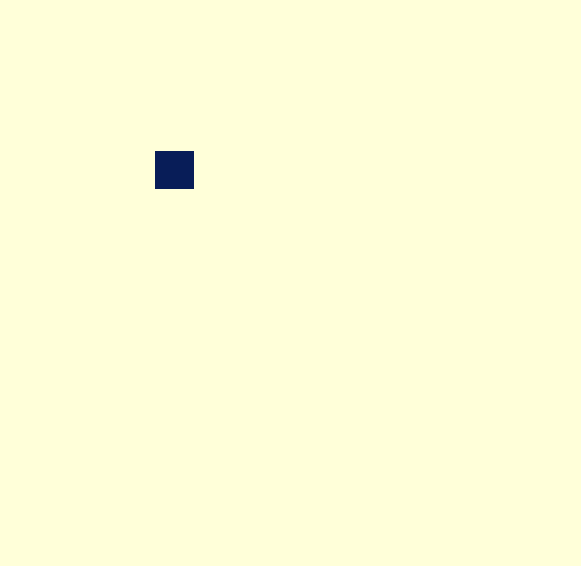

In [15]:
%%capture_png -p EmptyAndElement.png --celltype Dependend
array[4, 4] = 2
disp(array)

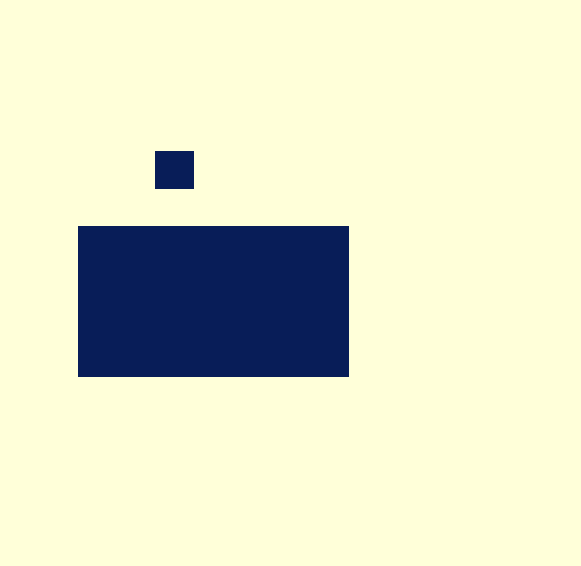

In [16]:
%%capture_png -p EmptyAndTwoElements.png --celltype Dependend
array[6:10, 2:9] = 2
disp(array)

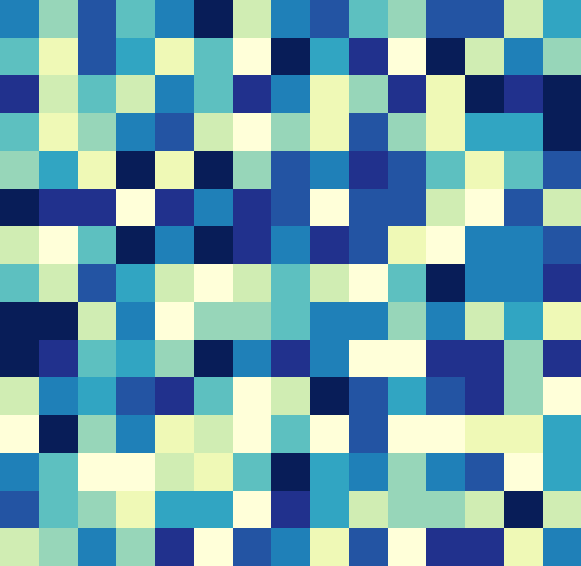

In [17]:
%%capture_png -p Random.png
np.random.seed(42)
array = np.random.randint(0, 10, size=(15, 15))
disp(array)

## 3D Arrays

In [18]:
ChapterConfig.set_chapter_name("3D Arrays")

(0.0, 1.0, 0.0, 1.0)

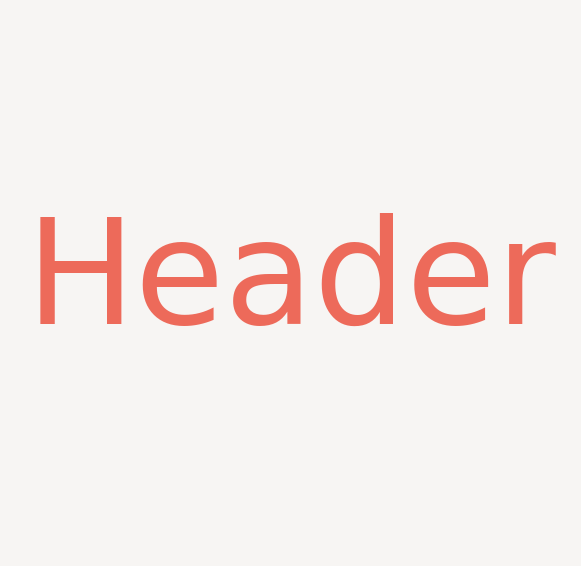

In [19]:
%%capture_png -p Header2.png  --celltype Header --style "width: 150px"

import scipy


def plot_voxels(varray, ax=None, title=None, linewidth=0.8, aspect=None):

    if ax == None:
        fig = plt.figure(figsize=(16 / 2, 9 / 2))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.view_init(30, 200)
    colors = cmap(varray)
    ax.voxels(varray, facecolors=colors, edgecolor="black", linewidth=linewidth)
    ax.axis("off")
    if aspect:
        ax.set_box_aspect(aspect=aspect)
    if title:
        ax.set_title(title, fontsize=30)


cmap = plt.get_cmap("YlGnBu")


import matplotlib.pyplot as plt  # NOT

fix, ax = plt.subplots(figsize=(5, 5), facecolor="#F7F5F3")  # NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A")  # NOT
ax.text(0.5, 0.5, "Header", **text_kwargs)  # NOT
ax.axis("off");  # NOT

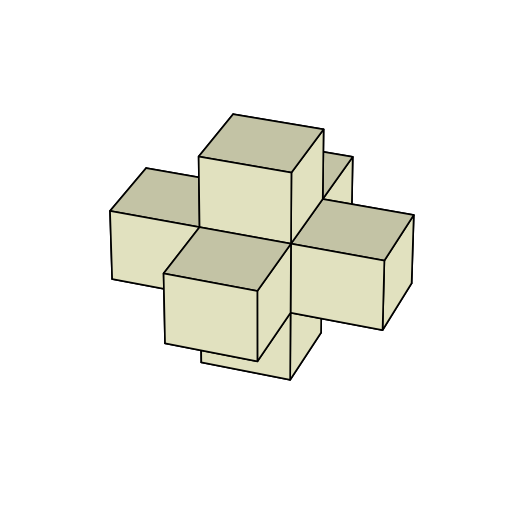

In [20]:
%%capture_png -p BinaryStructure1.png --style "width: 150px"
voxelarrray = scipy.ndimage.generate_binary_structure(3, 1)
plot_voxels(voxelarrray)

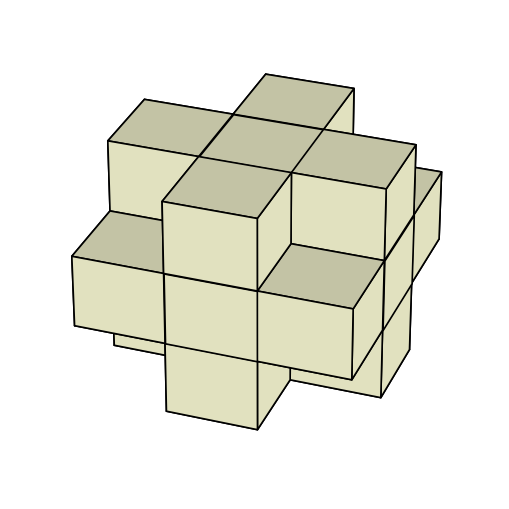

In [21]:
%%capture_png -p BinaryStructure2.png --style "width: 150px"
voxelarrray = scipy.ndimage.generate_binary_structure(3, 2)
plot_voxels(voxelarrray)

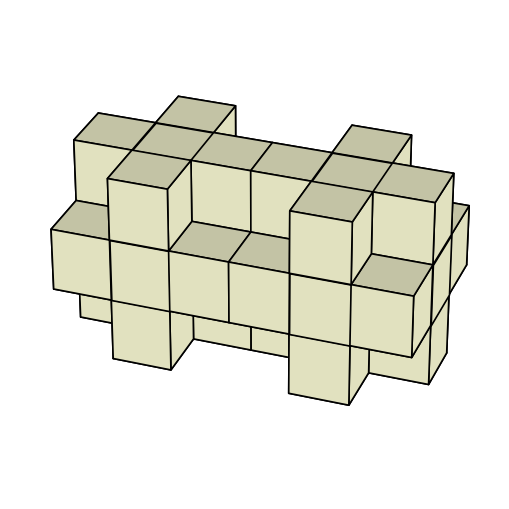

In [22]:
%%capture_png -p BinaryStructureConcat.png  --celltype Dependend --style "width: 150px;"
stacked_array = np.concatenate((voxelarrray, voxelarrray), axis=1)
plot_voxels(stacked_array, aspect=(1, 2, 1))

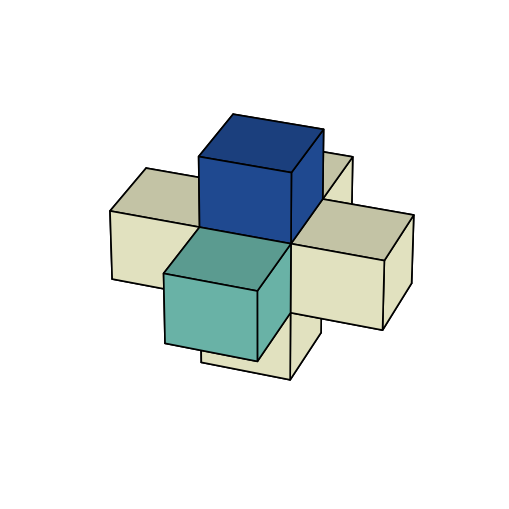

In [23]:
%%capture_png -p StructureLabeled.png  --celltype Normal --style "width: 150px;"

voxelarrray = np.uint8(scipy.ndimage.generate_binary_structure(3, 1))
voxelarrray[0, 1, 1] = 100
voxelarrray[1, 1, 2] = 200
plot_voxels(voxelarrray)

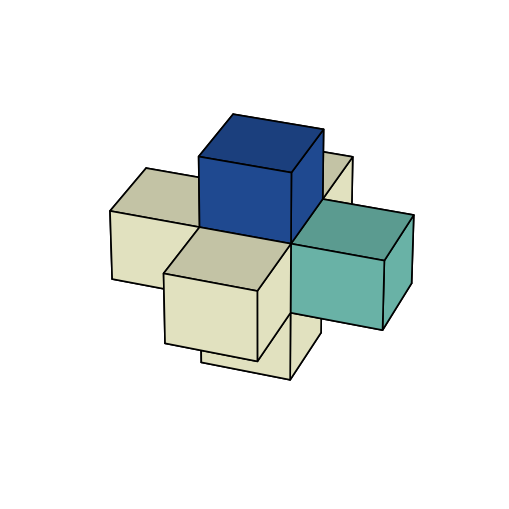

In [24]:
%%capture_png -p StructureLabeled.png  --celltype Dependend --style "width: 150px;"
plot_voxels(voxelarrray.swapaxes(0, 1))